## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation


dataset contains **6738 rows** and **9 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

- **model**: Same as description without missing values, having 18 unique models. No cleaning is needed. Datatype is object.
- **year**: Same as description without missing values, having 18 unique models. No cleaning is needed. Datatype is int64  

- **price**: Same as description without missing values, having 2114 unique models. No cleaning is needed. Datatype is int64     
 
- **transmission**: Same as description without missing values, having 4 unique models. No cleaning is needed. Datatype is object. 
 
- **mileage**: Same as description without missing values, having 5699 unique models. No cleaning is needed. Datatype is int64.
 
- **fuelType**: Same as description without missing values, having 4 unique models. No cleaning is needed. Datatype is object. 
 
- **tax**: Same as description without missing values, having 29 unique models. No cleaning is needed. Datatype is int64.
 
- **mpg**: Same as description without missing values, having 81 unique models. No cleaning is needed. Datatype is float64
 
- **engineSize**: Same as description without missing values, having 16 unique models. No cleaning is needed. Datatype is float64.  
After the data validation, the dataset contains 6738 rows and 9 columns.

# Exploratory Analysis

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_squared_error
plt.style.use('ggplot')


In [2]:
# loading dataset
dataset = pd.read_csv('toyota.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Text(0.5, 1.0, 'The Distribution of Target Variable - Price (Log Scale)')

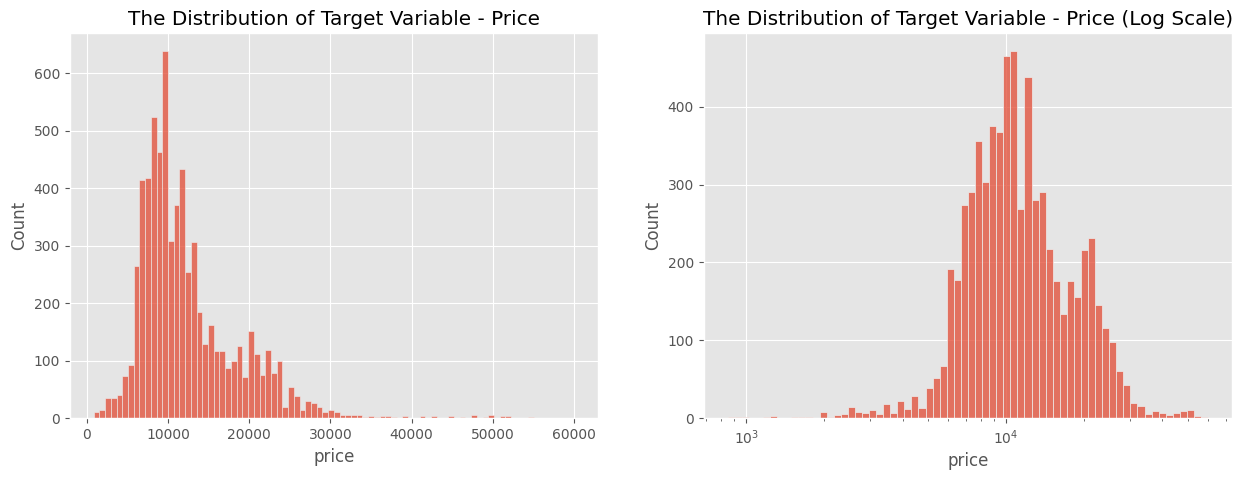

In [3]:
# task 1: Include two different graphics showing single variables only to demonstrate the characteristics of data

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(dataset['price'],ax=axes[0])
axes[0].set_title('The Distribution of Target Variable - Price')
sns.histplot(dataset['price'],log_scale=True,ax=axes[1])
axes[1].set_title('The Distribution of Target Variable - Price (Log Scale)')


In [4]:
dataset['price'] = np.log(dataset['price'])

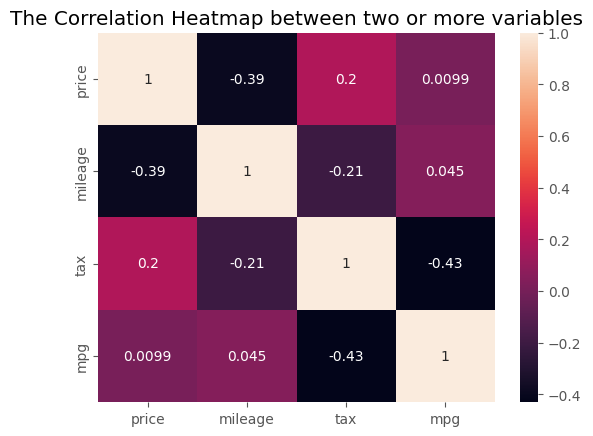

In [5]:
# Task 2: Include at least one graphic showing two or more variables to represent the relationship between features

sample = dataset[['price','mileage','tax','mpg']]
sns.heatmap(sample.corr(),annot=True).set(title='The Correlation Heatmap between two or more variables');

**Conclusion:** There is a moderate negative linear relationship in two pairs of variables that is the price log transformation and mileage, tax and mpg.

**To demonstrate the conclusion clearly I separately plotted scatter plot**

[Text(0.5, 1.0, 'Price vs tax')]

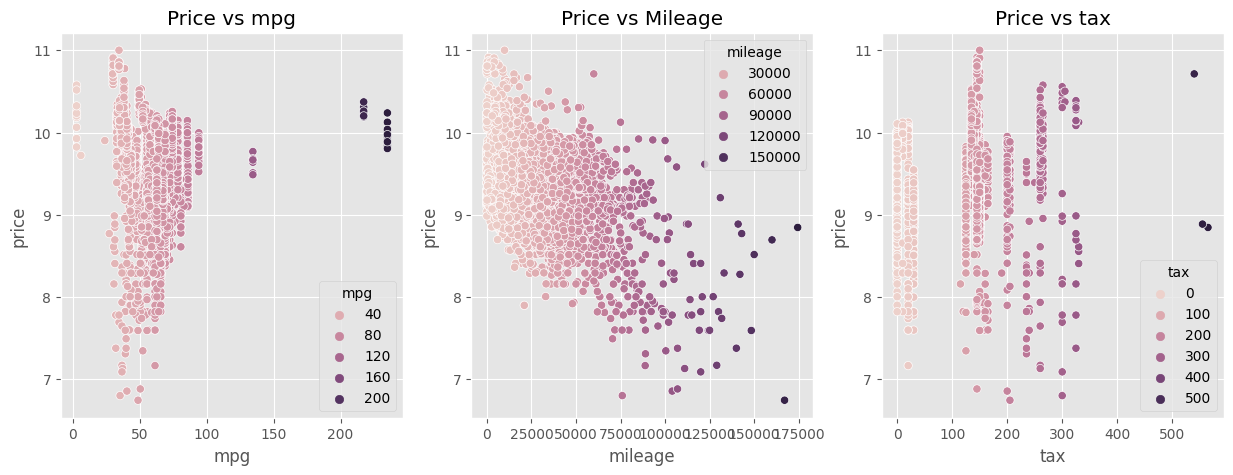

In [6]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(y=dataset['price'],x=dataset['mpg'], color='blue', hue=dataset['mpg'], ax=axes[0]).set(title='Price vs mpg')
sns.scatterplot(y=dataset['price'],x=dataset['mileage'],color='green', hue=dataset['mileage'], ax=axes[1]).set(title='Price vs Mileage');
sns.scatterplot(y=dataset['price'],x=dataset['tax'],color='red',hue=dataset['tax'], ax=axes[2]).set(title='Price vs tax')


**Conclusion:** 
- No relationship between **price and mpg**. 
- There is a linear relationship between **price and mileage**. 
- I found out there is clusters in the scatterplot between **price and tax**, so I decided to create a new ordinal variable from the tax variable.

# Why we are doing this??

In [7]:
# Convert tax variable into an ordinal variable  
dataset.loc[(dataset['tax'] <= 100,'tax')] = 1
dataset.loc[((dataset['tax'] <= 200) & (dataset['tax'] > 100) ,'tax')] = 2
dataset.loc[((dataset['tax'] <= 300) & (dataset['tax'] > 200) ,'tax')] = 3
dataset.loc[(dataset['tax'] > 300 ,'tax')] = 4

### Categorical Variables - Model, Transmission, fuelType
As like we have checked the relationship between numeric variables, that includes mpg, tax, and mileage. we will also be checking the relationship between categorical variables that includes enginesize and year.


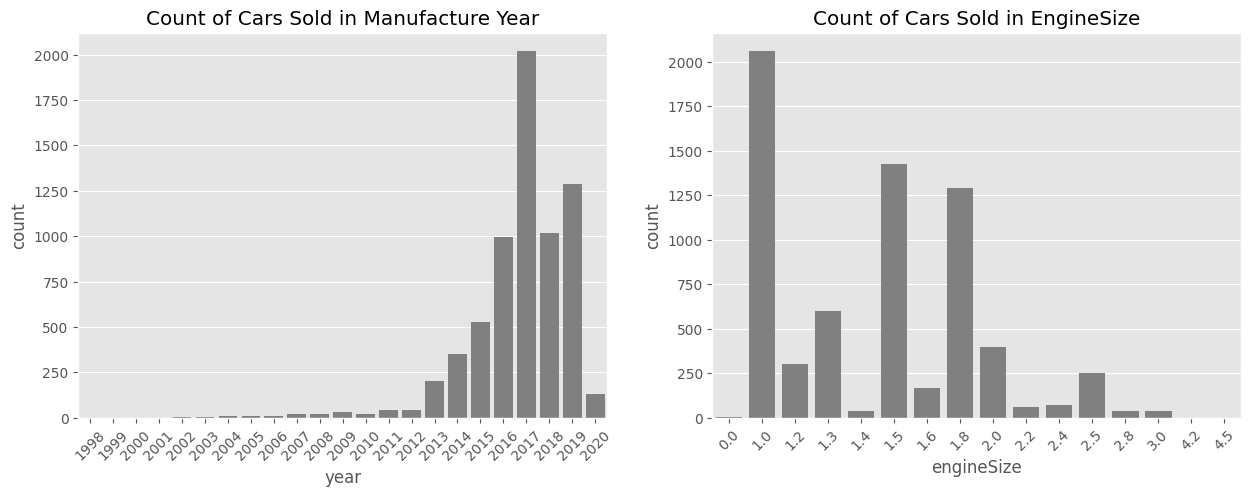

In [8]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=dataset['year'], color='gray',ax=axes[0]).set(title='Count of Cars Sold in Manufacture Year')
sns.countplot(x=dataset['engineSize'],color='gray',ax=axes[1]).set(title='Count of Cars Sold in EngineSize')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45);

**Conclusion:** Since year and engine size is most related to price, I checked their characteristics. From the bar chart below, the most common manufacture year is 2016. Also, the most common engine size in is 1.

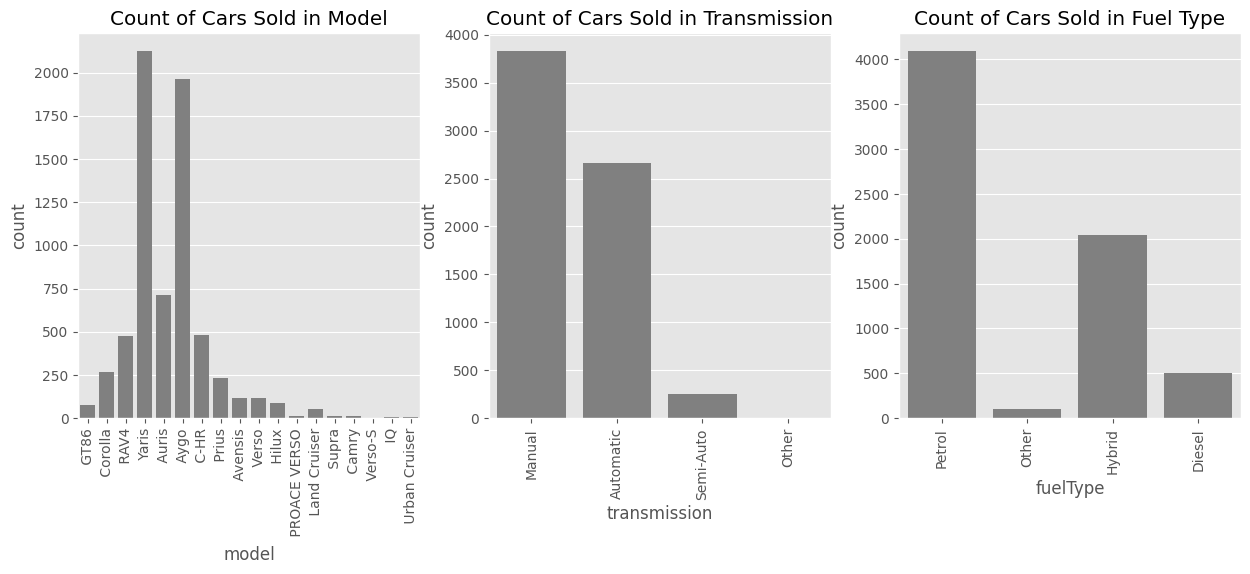

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=dataset['model'],color='gray',ax=axes[0]).set(title='Count of Cars Sold in Model')
sns.countplot(x=dataset['transmission'],color='gray',ax=axes[1]).set(title='Count of Cars Sold in Transmission')
sns.countplot(x=dataset['fuelType'],color='gray',ax=axes[2]).set(title='Count of Cars Sold in Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

**Note:** From the bar charts below, we can see the most frequent categories in model, transmission and fuelType variables - Yaris, Manual, Petrol in the dataset.

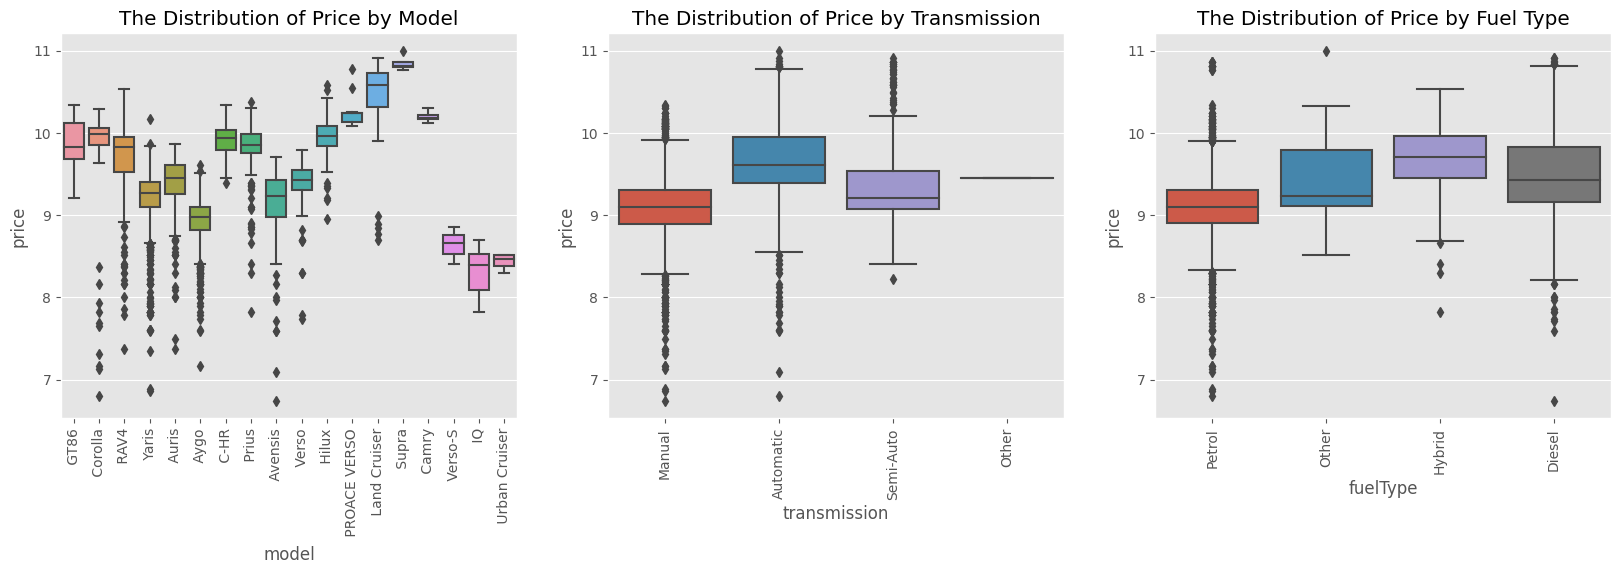

In [10]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=dataset, x='model',y='price',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=dataset, x='transmission',y='price',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=dataset, x='fuelType',y='price',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

**Conclusion:**
I have investigated their relationship between price too. From the boxplots, we can see there is a difference in distribution of prices among each categories in each variable. So the variation of price for each category is shown above.



# Model Fitting & Evaluation



In machine learning, predicting prices is a task that falls under regression problems. I have opted for the **Linear Regression model** as there exists a strong to moderate correlation between certain features and the target variable. The **Decision Tree** regression model has been selected as a comparison model because it provides an easy-to-understand interpretation and is not affected by outliers.

To assess the models, I will use two evaluation metrics, **R squared** and **RMSE** (Root Mean Squared Error). R squared measures the fit of the model with the dependent variables (features), while RMSE determines the extent to which the predicted results differ from the actual numbers.

## Prepare Data for Modelling
To enable modelling, we chose year, model, transmission, mileage, fuelType, tax, engineSize as features, price as target variables. I also have made the following changes:

- Normalize the numeric features
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

In [11]:
label_encoder = LabelEncoder()
dataset['model'] = label_encoder.fit_transform(dataset['model'])
dataset['transmission'] = label_encoder.fit_transform(dataset['transmission'])
dataset['fuelType'] = label_encoder.fit_transform(dataset['fuelType'])

In [12]:
feature_cols = ['year','transmission','fuelType','engineSize','tax','model','mileage']
X = dataset[feature_cols] # Features
y = dataset['price'] # Target variable

In [13]:
# define the scaler 
scaler = PowerTransformer()
# fit and transform the train set
X[['year','engineSize','mileage']] = scaler.fit_transform(X[['year','engineSize','mileage']])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression Model

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Finding the feature importance

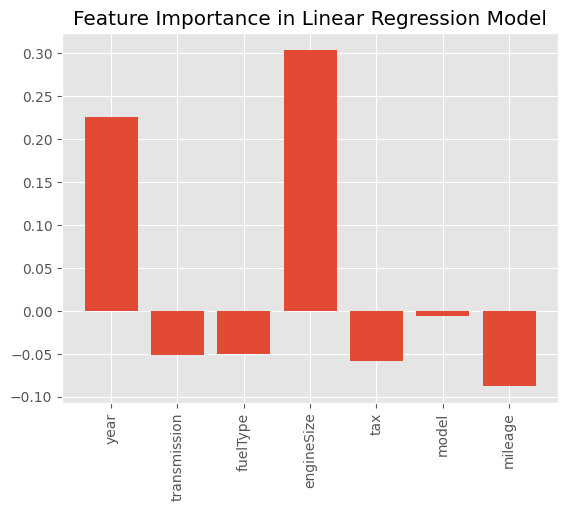

In [16]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = lr.coef_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Linear Regression Model');

### Decision Tree Regression Model

In [17]:
tree = DecisionTreeRegressor(max_depth=12,min_samples_split=2,random_state=42)
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

In [18]:
d_r2 = tree.score(X_test, y_test)
print("Decision Tree Regressor R-squared: {}".format(d_r2))

d_mse = mean_squared_error(y_pred2, y_test)
d_rmse = np.sqrt(d_mse)
print("Decision Tree Regressor RMSE: {}".format(d_rmse))

Decision Tree Regressor R-squared: 0.9373446430064711
Decision Tree Regressor RMSE: 0.11889426976624617


### Finding the best parameter for Decision Tree Regression Model

Best max_depth is: 12 
Testing R^2 is: 0.9373446430064711


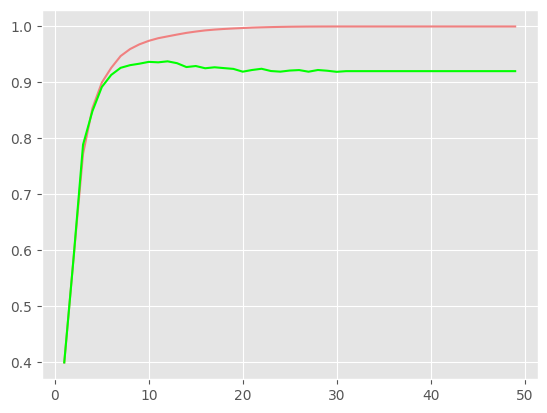

In [19]:
train_score = []
test_score = []
max_score = 0
max_pair = (0,0)

for i in range(1,50):
    tree = DecisionTreeRegressor(max_depth=i,random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    train_score.append(tree.score(X_train,y_train))
    test_score.append(r2_score(y_test,y_pred))
    test_pair = (i,r2_score(y_test,y_pred))
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1,50), train_score, label = "Training R^2",color='lightcoral')
ax.plot(np.arange(1,50), test_score, label = "Testing R^2",color='lime')
print(f'Best max_depth is: {max_pair[0]} \nTesting R^2 is: {max_pair[1]}')

### Finding the feature importance

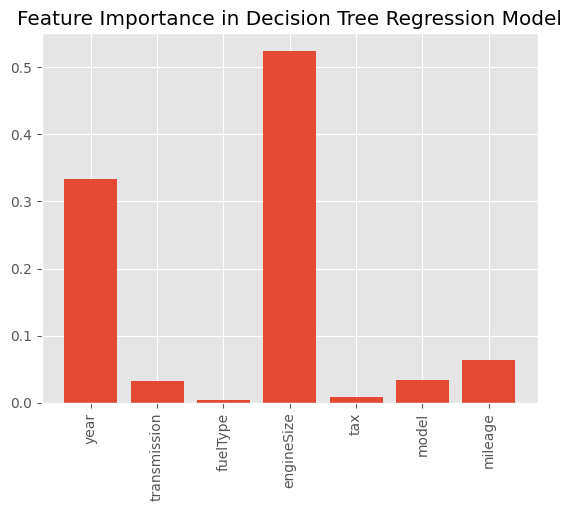

In [20]:
importance = tree.feature_importances_

f_importance = {}
for i in range(len(feature_cols)):
     f_importance[feature_cols[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Decision Tree Regression Model');

### Results
The R squared of the Linear Regression, and the Decision Tree Regression model is 0.86 and 0.94, meaning the Decision Tree Regression model fits the features better. The RMSE of the Linear Regression, and the Decision Tree Regression model is 0.18 and 0.12, meaning the Decision Tree Regression model has less error in predicting values.

### Evaluate by Business Criteria
The company wants to avoid prediction out of a range - more than £1500 higher from actual price. Therefore, we would consider using percentage of predictions which predicted price is not more than £1500 higher than actual price as a KPI to compare the two models again. The higher the percentage, the better the model performs. 90% of the decision tree regressor prediction is not more than £1500 higher than actual sell price, while the linear regression model only have 87%.

In [21]:
X_test['Predicted_price'] = np.round(np.exp(y_pred),0)
X_test['Price'] = np.round(np.exp(y_test),0)
lr_e = X_test

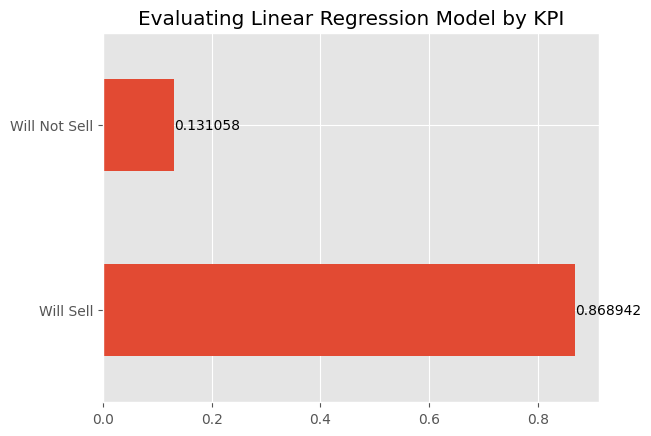

In [22]:
lr_e['Diff'] = lr_e['Predicted_price'] - lr_e['Price']
lr_e['Result'] =  lr_e['Diff'] > 1500
lr_e['Category'] = lr_e['Result'].apply(lambda x: 'Will Not Sell' if x == True else 'Will Sell')
ax = lr_e['Category'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Linear Regression Model by KPI');

In [23]:
X_test['Predicted_price'] = np.round(np.exp(y_pred2),0)
X_test['Price'] = np.round(np.exp(y_test),0)
tree_e = X_test

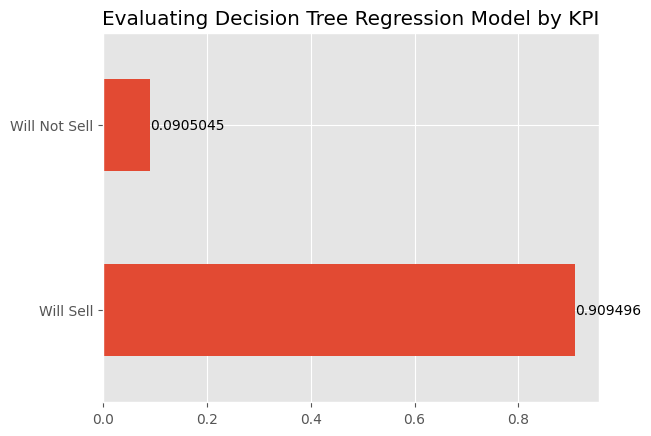

In [24]:
tree_e['Diff'] = tree_e['Predicted_price'] - tree_e['Price']
tree_e['Result'] =  tree_e['Diff'] > 1500
tree_e['Category'] = tree_e['Result'].apply(lambda x: 'Will Not Sell' if x == True else 'Will Sell')
ax = tree_e['Category'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Decision Tree Regression Model by KPI');

### Recommendation
To help junior salespeople better predict the price, we can deploy this Decision Tree Regression Model into production. By implementing this model, about 91% of the prediction will make sure the cars is very likely to be sold. This will help junior salespeople build their confidence in generating more sales.

To better evaluate whether this model can really help junior salespeople price used cars, I would also recommend A/B testing about using this model to compare two groups of junior salespeople.

To implement and improve the model, I will consider the following steps:

- Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices such as mobile and IoT for its convenience and security. However, this might need some work. I will suggest deploying as web services first since it is the easiest way and test the model in newly hired junior salespeople.
- Collecting more data, e.g. time and economic data, the inflation has a huge influence on the car price recently
- Feature Engineering, e.g reduce the categories in model, create more meaningful features from the variables.